## 상관분석 개요
- 목적 : 두 연속형 변수 간에 어떠한 선형 관계를 가지는지 파악
- 귀무과설과 대립가설
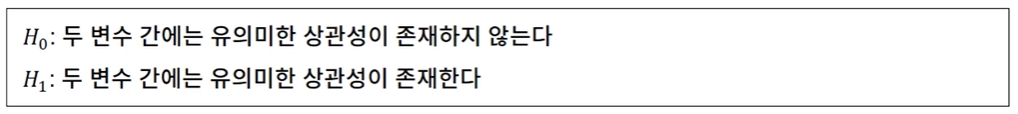
- 시각화 방법 : 산점도 (scatter plot)

## 피어슨 상관 계수
- 두 변수 모두 연속형 변수일 때 사용하는 상관 계수로 x와 y에 대한 상관 계수
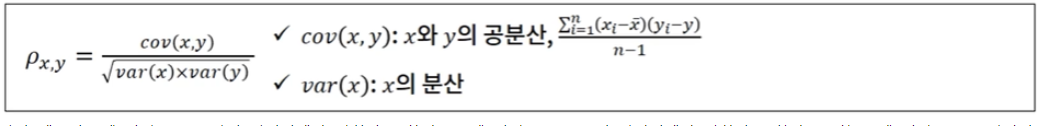
- 상관 계수가 1에 가까울수록 양의 상관관계가 강하다고 하며, -1에 가까울수록 음의 상관관계가 강하다고 한다. 또한, 0에 가까울수록 상관관계가 약하다고 한다.

## 스피어만 상관 계수
- 두 변수의 순위 사이의 단조 관련성을 측정하는 상관 계수로 x와 y애 대한 스피어만 상관 계수 S(x,y)는 다음과 같이 정의됨
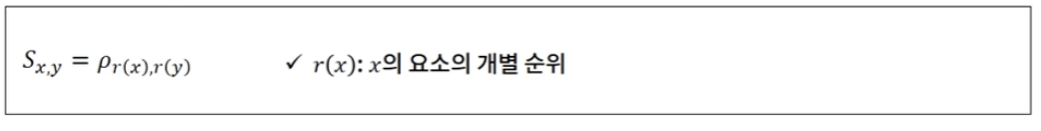

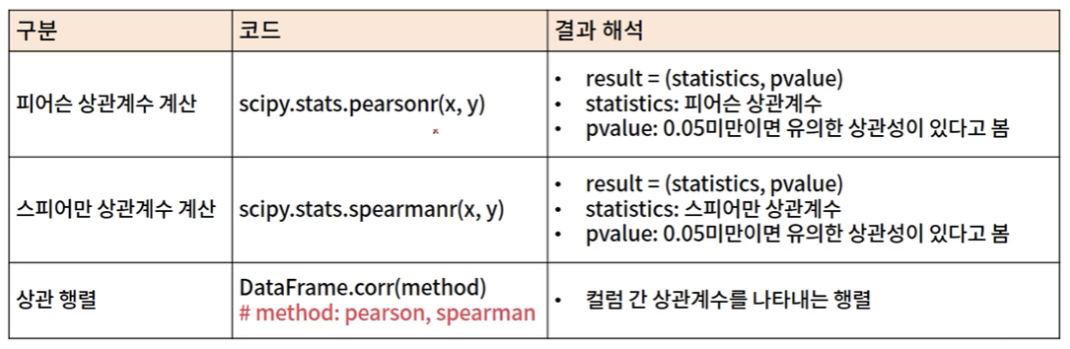

In [1]:
import os
import pandas as pd
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-2.-탐색적-데이터-분석\2. 탐색적 데이터 분석\데이터')

In [2]:
df = pd.read_excel('일별_금은달러.xlsx')

In [3]:
df.head()

,일자,금값,은값,달러 환율
0,2020.08.07,78538.90,27.53,1188.5
1,2020.08.06,78009.22,28.39,1185.5
2,2020.08.05,77748.00,26.88,1188.0
3,2020.08.04,75873.57,26.01,1194.5
4,2020.08.03,75761.76,24.39,1195.7


In [4]:
df.sort_values(by= '일자', inplace = True)

In [6]:
df.head()

,일자,금값,은값,달러 환율
27,2020.06.30,68559.78,18.54,1203.0
26,2020.07.01,68941.28,18.13,1203.5
25,2020.07.02,68278.07,18.24,1199.0
24,2020.07.06,68269.27,18.50,1194.0
23,2020.07.07,68443.14,18.63,1197.0


In [7]:
# 그래프 기본 설정
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10, 8)

([<matplotlib.axis.XTick at 0x18ceec5da60>,
 <a list of 4 Text major ticklabel objects>)

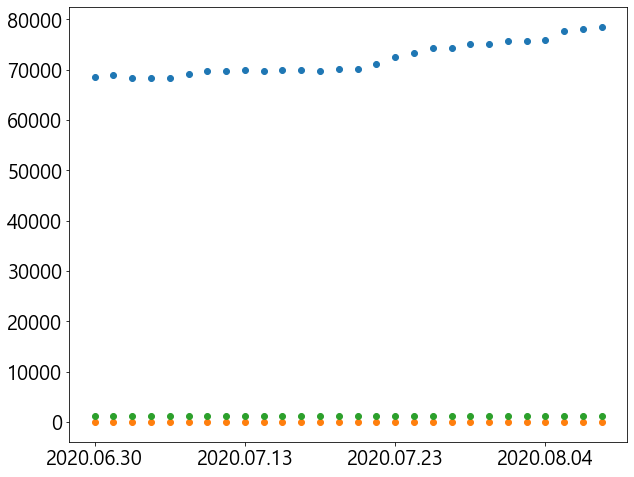

In [8]:
plt.scatter(df['일자'], df['금값'])
plt.scatter(df['일자'], df['은값'])
plt.scatter(df['일자'], df['달러 환율'])
plt.xticks(df['일자'].iloc[::8])

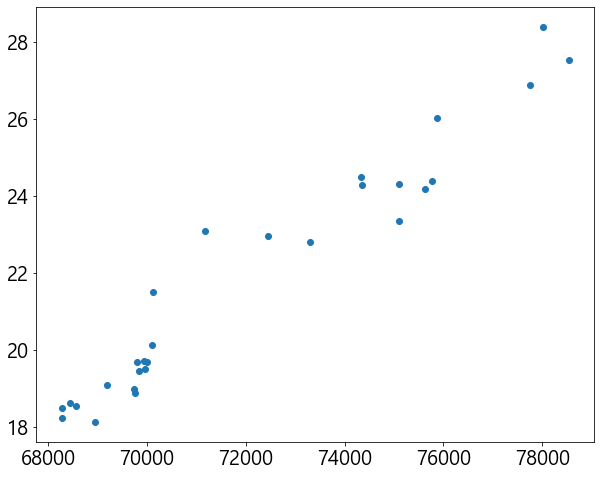

In [9]:
plt.scatter(df['금값'], df['은값'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018CF0E907F0>,
      dtype=object)

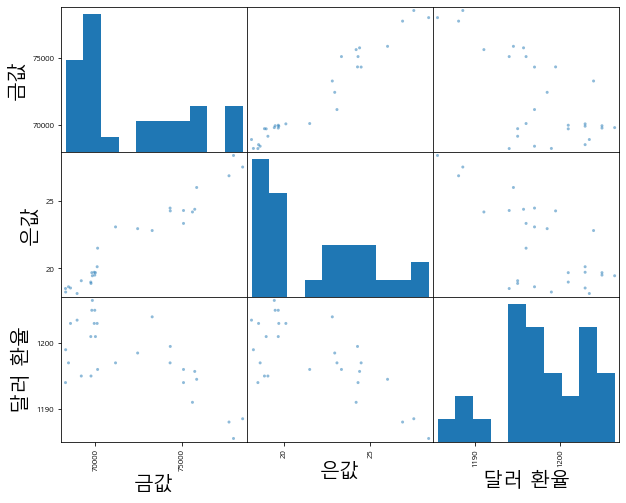

In [10]:
pd.plotting.scatter_matrix(df.drop('일자', axis = 1))

In [11]:
from scipy.stats import *
print(pearsonr(df['금값'], df['은값']))
print(pearsonr(df['금값'], df['달러 환율']))
print(pearsonr(df['은값'], df['달러 환율']))

(0.9718640116033497, 7.508878356556937e-18)
(-0.6793266264341936, 7.03332525845228e-05)
(-0.6954569556203559, 3.989042061957972e-05)


In [12]:
import itertools
target_columns = ['금값', '은값', '달러 환율']
for col1, col2 in itertools.combinations(target_columns, 2):
    result = pearsonr(df[col1], df[col2])
    print("{} ~ {}: coef:{}, p-value: {}".format(col1, col2, result[0], result[1]))

금값 ~ 은값: coef:0.9718640116033497, p-value: 7.508878356556937e-18
금값 ~ 달러 환율: coef:-0.6793266264341936, p-value: 7.03332525845228e-05
은값 ~ 달러 환율: coef:-0.6954569556203559, p-value: 3.989042061957972e-05


In [13]:
import itertools
target_columns = ['금값', '은값', '달러 환율']
for col1, col2 in itertools.combinations(target_columns, 2):
    result = spearmanr(df[col1], df[col2])
    print("{} ~ {}: coef:{}, p-value: {}".format(col1, col2, result[0], result[1]))

금값 ~ 은값: coef:0.9711235892228813, p-value: 1.0481280432981455e-17
금값 ~ 달러 환율: coef:-0.5039075855936102, p-value: 0.006257468267109452
은값 ~ 달러 환율: coef:-0.528106006718531, p-value: 0.003869997604824081


In [14]:
df.drop('일자', axis = 1).corr(method = 'pearson')

,금값,은값,달러 환율
금값,1.000000,0.971864,-0.679327
은값,0.971864,1.000000,-0.695457
달러 환율,-0.679327,-0.695457,1.000000


In [15]:
df.drop('일자', axis = 1).corr(method = 'spearman')

,금값,은값,달러 환율
금값,1.000000,0.971124,-0.503908
은값,0.971124,1.000000,-0.528106
달러 환율,-0.503908,-0.528106,1.000000
